## Dev env configuration

In [21]:
# install the required python packages
# !pip install numpy pandas yfinance matplotlib mplfinance seaborn

## Imports

In [22]:
# import the necessary packages
from datetime import timedelta
from datetime import datetime
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns
import yfinance as yf
import pandas as pd

## Fetch market data

In [13]:
# set the start and end dates for our market data request to be TTM
end_date = datetime(year=2025, month=3, day=1)
start_date = end_date - timedelta(days=365)

# set the name of the ticker we want to download market data for
ticker = "AAPL"

In [28]:
# download market data
df = yf.download(
    tickers=ticker,
    start=start_date,
    end=end_date,
    interval="1d",
    group_by="ticker",
    auto_adjust=True,
    progress=False
)
df

Ticker            AAPL                                              
Price             Open        High         Low       Close    Volume
Date                                                                
2024-03-01  178.706175  179.681565  176.546375  178.815659  73488000
2024-03-04  175.322137  176.068613  172.973228  174.277084  81510100
2024-03-05  169.957472  171.231455  168.822830  169.320480  95132400
2024-03-06  170.256065  170.435227  167.887245  168.325180  68587700
2024-03-07  168.355054  169.927630  167.698167  168.205765  71765100
...                ...         ...         ...         ...       ...
2025-02-24  244.929993  248.860001  244.419998  247.100006  51326400
2025-02-25  248.000000  250.000000  244.910004  247.039993  48013300
2025-02-26  244.330002  244.979996  239.130005  240.360001  44433600
2025-02-27  239.410004  242.460007  237.059998  237.300003  41153600
2025-02-28  236.949997  242.089996  230.199997  241.839996  56796200

[250 rows x 5 columns]

## Basic line plot of closing prices

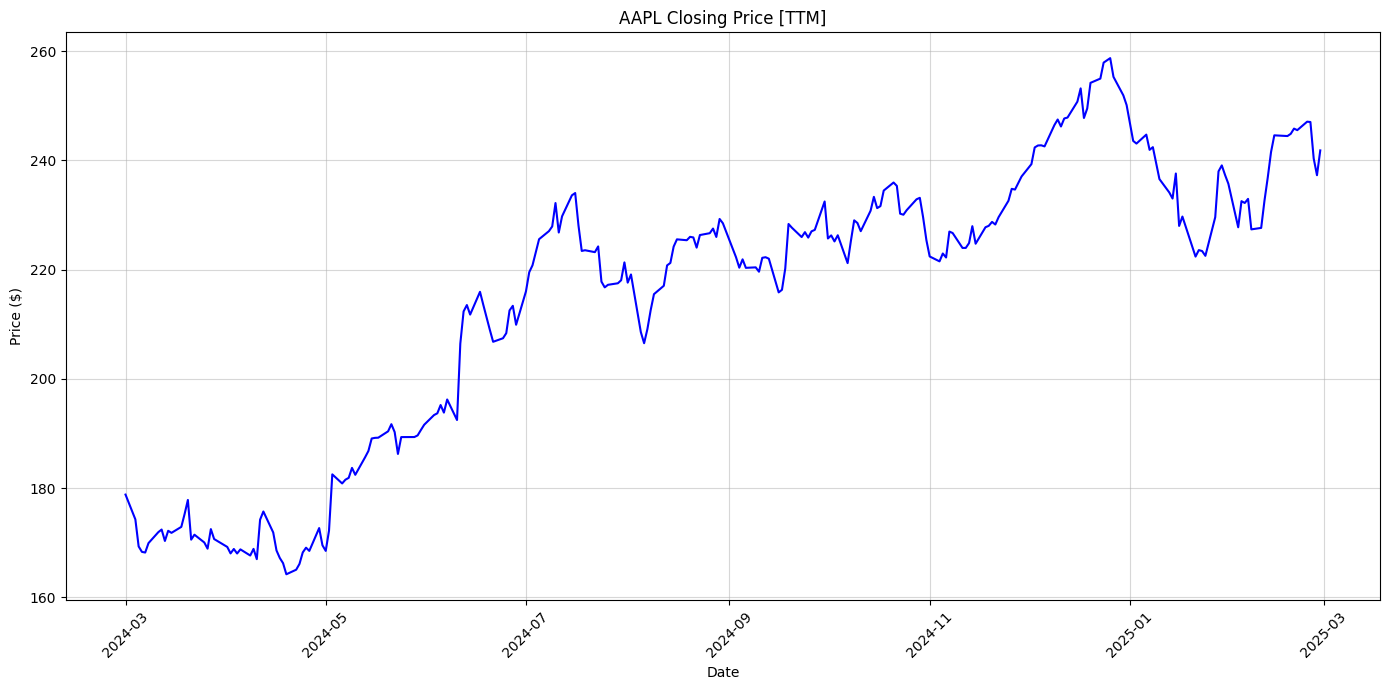

In [31]:
# initialize an empty figure
plt.figure(figsize=(14, 7))
plt.grid(alpha=0.5)

# plot the closing prices
plt.plot(df.index, df["AAPL"]["Close"], color="blue", linewidth=1.5)

# set the plot title and axis labels
plt.title(f"{ticker} Closing Price [TTM]")
plt.xlabel("Date")
plt.ylabel("Price ($)")

# finish constructing the plot
plt.xticks(rotation=45)
plt.tight_layout()

# show the plot
plt.show()

## Plotting candlestick chart of OHLC data



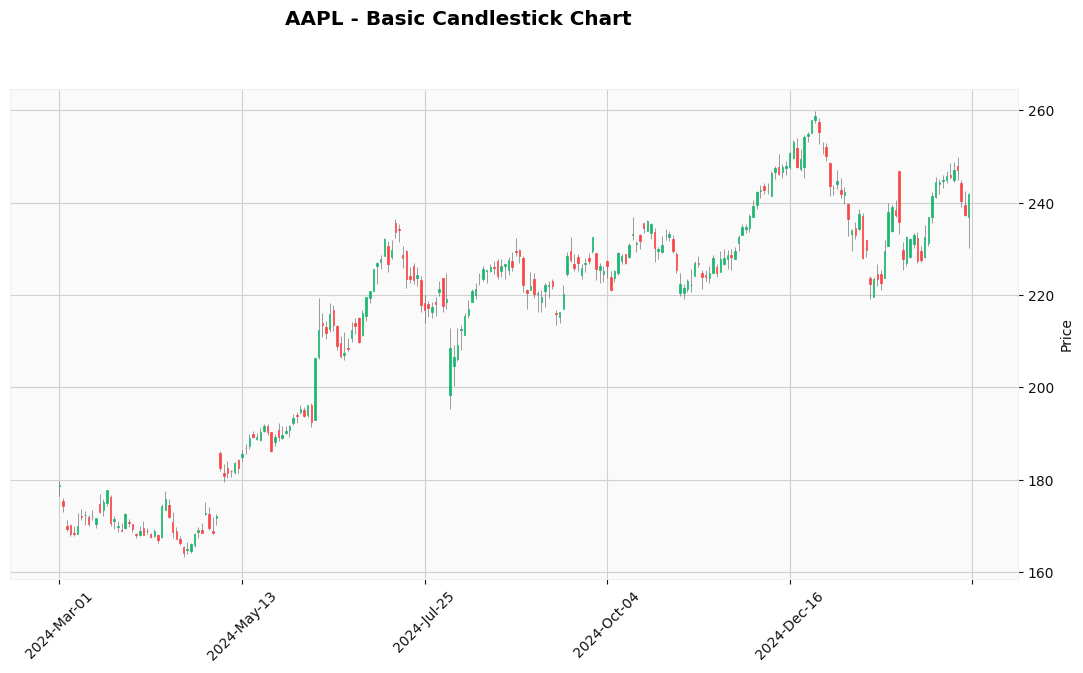

In [37]:
# plot the open, high, low, and close candlestick data
mpf.plot(
    df["AAPL"],
    type="candle",
    style="yahoo",
    figsize=(14, 7),
    title=f"{ticker} - Basic Candlestick Chart"
)

In [26]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-03-01,178.815659,179.681565,176.546375,178.706175,73488000
2024-03-04,174.277084,176.068613,172.973228,175.322137,81510100
2024-03-05,169.320480,171.231455,168.822830,169.957472,95132400
2024-03-06,168.325180,170.435227,167.887245,170.256065,68587700
2024-03-07,168.205765,169.927630,167.698167,168.355054,71765100
...,...,...,...,...,...
2025-02-24,247.100006,248.860001,244.419998,244.929993,51326400
2025-02-25,247.039993,250.000000,244.910004,248.000000,48013300


## Adding volume to candlestick chart

## Plotting only recent OHLCV data